## Importing the required libraries

In [6]:
# Helper Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

print(keras.__version__)
     

2.12.0
2.12.0


In [8]:
from keras.utils import np_utils

from keras.models import Sequential 

from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten

from keras.preprocessing.image import ImageDataGenerator
np.random.seed(25)

## Load the Data

In [9]:
from keras.datasets import mnist, cifar10

In [10]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


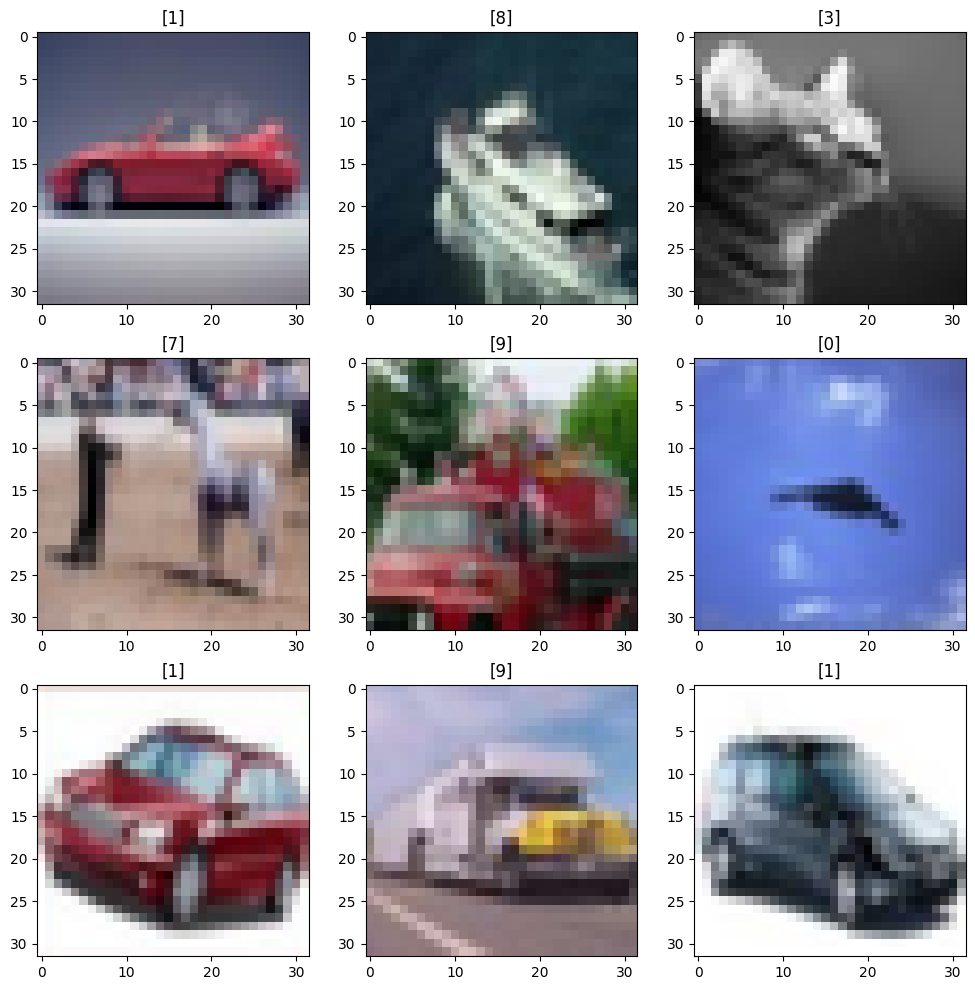

In [12]:
plt.figure(figsize=(12, 12))

idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
  plt.subplot(3, 3, i+1)
  plt.title(y_train[idx[i]])
  plt.imshow(X_train[idx[i]])

In [13]:
X_train.shape

(50000, 32, 32, 3)

## Data Preprocessing

In [14]:
# Type Conversion of Columns
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train = X_train/255
X_test = X_test/255

# X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
# X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [15]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

number_of_classes = 10

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : [6]
After converting the output into a vector :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Building the Model

**Step-1 Define the Model**

Three steps to Convolution
1. Convolution
2. Activation
3. Polling
  - (Repeat Steps 1,2,3 for adding more hidden layers)

4. After that make a fully connected network
This fully connected network gives ability to the CNN
to classify the samples

In [16]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), input_shape = (32,32,3), activation='relu'))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))

model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))

# Maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))

model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))

# Maxpooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# Fully Connected layer
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax'))

**Step-2 Compile the Model**

In [17]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
train_gen = ImageDataGenerator(rotation_range = 8,
                               width_shift_range = 0.08,
                               shear_range = 0.3,
                               height_shift_range = 0.08,
                               zoom_range = 0.08,
                               # horizontal_flip=True,
                               brightness_range=[0.2,1.2])

test_gen = ImageDataGenerator()

In [19]:
train_generator = train_gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

**STEP-3 Fit the Model**

In [20]:
model.fit(X_train, Y_train, batch_size=128, epochs=15)

# model.fit(train_generator,
#           validation_data = test_generator,
#           validation_steps=10000//64,
#           epochs=15)

Epoch 1/15
391/391 [==============================] - 696s 2s/step - loss: 1.6811 - accuracy: 0.3804
Epoch 2/15
391/391 [==============================] - 685s 2s/step - loss: 1.3099 - accuracy: 0.5284
Epoch 3/15
391/391 [==============================] - 682s 2s/step - loss: 1.1334 - accuracy: 0.5974
Epoch 4/15
391/391 [==============================] - 681s 2s/step - loss: 1.0038 - accuracy: 0.6436
Epoch 5/15
391/391 [==============================] - 684s 2s/step - loss: 0.9010 - accuracy: 0.6813
Epoch 6/15
391/391 [==============================] - 683s 2s/step - loss: 0.8239 - accuracy: 0.7102
Epoch 7/15
391/391 [==============================] - 683s 2s/step - loss: 0.7673 - accuracy: 0.7304
Epoch 8/15
391/391 [==============================] - 684s 2s/step - loss: 0.7216 - accuracy: 0.7484
Epoch 9/15
391/391 [==============================] - 683s 2s/step - loss: 0.6792 - accuracy: 0.7603
Epoch 10/15
391/391 [==============================] - 682s 2s/step - loss: 0.6347 - accura

In [21]:
prediction_score = model.evaluate(X_test, Y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score[0]*100, prediction_score[1]*100)

Test Loss and Test Accuracy 79.949551820755 74.80999827384949


## Predictions

In [22]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis=1)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.head(5)

313/313 [==============================] - 35s 111ms/step


,Actual,Predictions
0,[3],3
1,[8],8
2,[8],8
3,[0],1
4,[6],6
